In [1]:
library(fpp3) 
library(caret)
library(ranger)
library(xgboost)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.8      ✔ tsibble     1.1.3 
✔ dplyr       1.0.10     ✔ tsibbledata 0.4.1 
✔ tidyr       1.2.1      ✔ feasts      0.3.0 
✔ lubridate   1.9.0      ✔ fable       0.3.2 
✔ ggplot2     3.4.0      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:fabletools’:

    MAE, RMSE



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [4]:
air <- as_tsibble(AirPassengers)

Plot variable not specified, automatically selected `y = value`


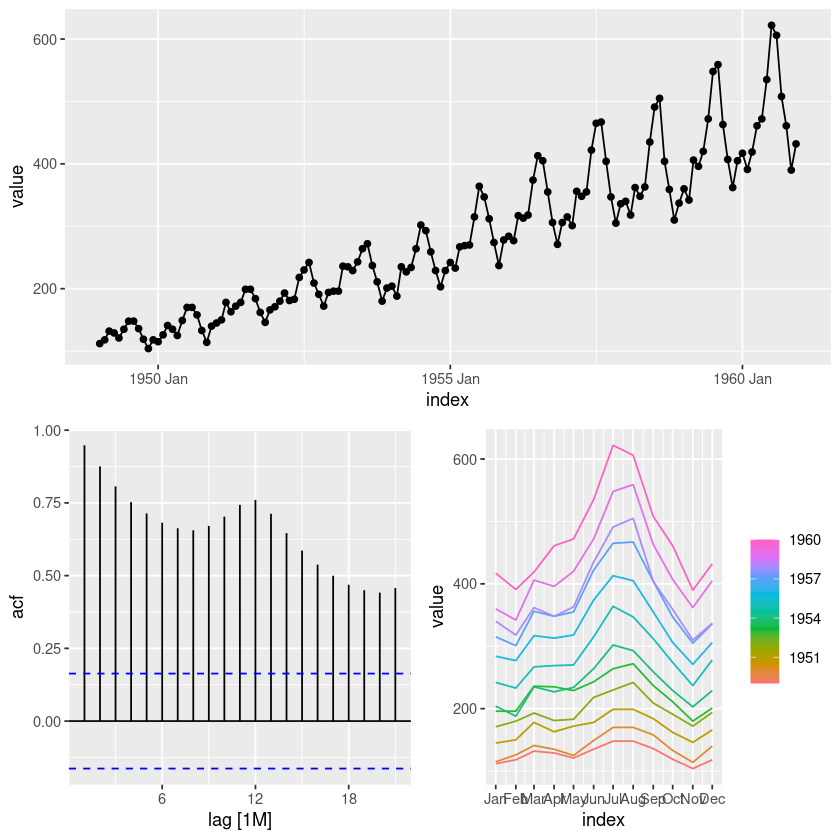

In [5]:
gg_tsdisplay(air)

In [7]:
air2 = mutate(air, ln_pass=log(value), t=1:nrow(air))
air2

index,value,ln_pass,t
<mth>,<dbl>,<dbl>,<int>
1949 Jan,112,4.718499,1
1949 Feb,118,4.770685,2
1949 Mar,132,4.882802,3
1949 Apr,129,4.859812,4
1949 May,121,4.795791,5
1949 Jun,135,4.905275,6
1949 Jul,148,4.997212,7
1949 Aug,148,4.997212,8
1949 Sep,136,4.912655,9


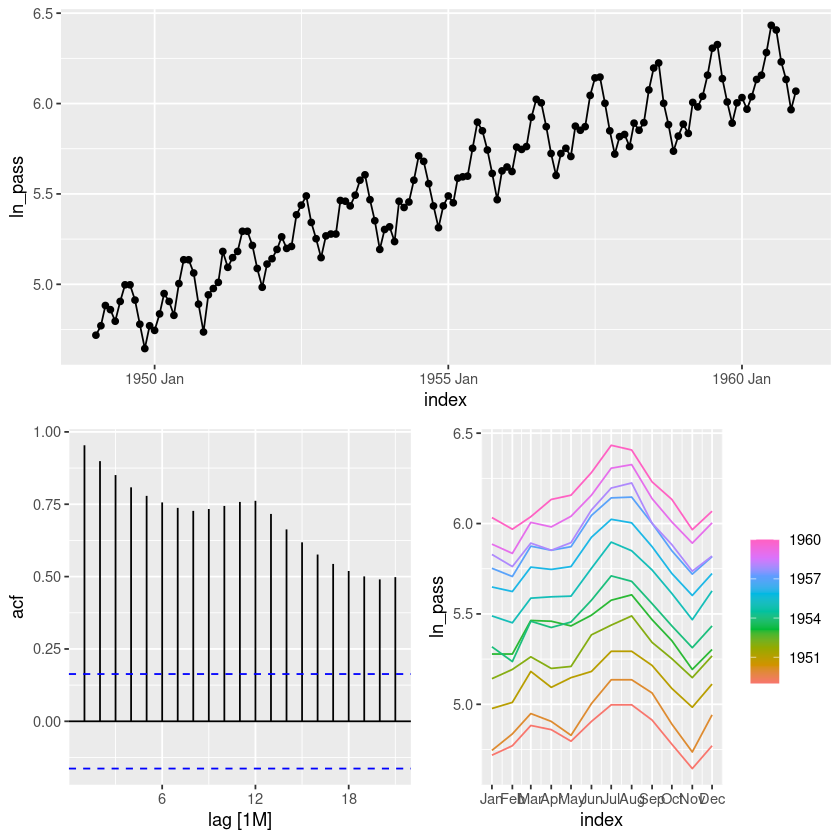

In [8]:
gg_tsdisplay(air2, ln_pass)

In [9]:
fourier_x <- forecast::fourier(AirPassengers, K=2)
fourier_x

S1-12,C1-12,S2-12,C2-12
0.5000000,0.8660254,0.8660254,0.5
0.8660254,0.5000000,0.8660254,-0.5
1.0000000,0.0000000,0.0000000,-1.0
0.8660254,-0.5000000,-0.8660254,-0.5
0.5000000,-0.8660254,-0.8660254,0.5
0.0000000,-1.0000000,0.0000000,1.0
-0.5000000,-0.8660254,0.8660254,0.5
-0.8660254,-0.5000000,0.8660254,-0.5
-1.0000000,0.0000000,0.0000000,-1.0
-0.8660254,0.5000000,-0.8660254,-0.5


In [14]:
colnames(fourier_x) = c('s1','c1','s2','c2')

In [15]:
air3 = bind_cols(air2, fourier_x)

In [16]:
air3train <- head(air3, -24)
air3test <- tail(air3, 24)

In [17]:
cv_params = trainControl(method = 'cv',
                         number = 5)

In [18]:
ols = train(ln_pass ~ t + s1 + c1 + s2 + c2, 
            data = air3train,
            trControl = cv_params,
            method = 'lm')
rf = train(ln_pass ~ t + s1 + c1 + s2 + c2, 
            data = air3train,
            trControl = cv_params,
            method = 'ranger',
           num.trees = 1000)
gb = train(ln_pass ~ t + s1 + c1 + s2 + c2, 
           data = air3train,
           trControl = cv_params,
           method = 'xgbTree')

[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/c_api/c_api.cc:785: `ntree_limit` is deprecated, use `iteration_range` instead.
[13:50:03] WARNING: amalgamation/../src/

In [22]:
ols_fcst = predict(ols, air3test)
rf_fcst = predict(rf, air3test)
gb_fcst = predict(gb, air3test)

In [23]:
a <- air3test[['ln_pass']] - ols_fcst
b <- air3test[['ln_pass']] - rf_fcst
c <- air3test[['ln_pass']] - gb_fcst

In [24]:
forecast::dm.test(a,b)


	Diebold-Mariano Test

data:  ab
DM = -3.5021, Forecast horizon = 1, Loss function power = 2, p-value =
0.001918
alternative hypothesis: two.sided


In [25]:
forecast::dm.test(b,c)


	Diebold-Mariano Test

data:  bc
DM = -3.8016, Forecast horizon = 1, Loss function power = 2, p-value =
0.0009197
alternative hypothesis: two.sided
